In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
#Import Api Key
weather_api_key = "1b1f49a514a09ec6638879080888d881"


In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [6]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + "1b1f49a514a09ec6638879080888d881"

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | verkh-usugli
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | pailon
Processing Record 6 of Set 1 | bowen
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | coihueco
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | yerbogachen
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | zvolen
Processing Record 17 of Set 1 | kayerkan
Processing Record 18 of Set 1 | shingu
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | solano
Processing Record 21 of Set 1 | palmares
Processing Record 22 of Set 1 | sabang
Processing Record 23 of Set 1 | ostrovnoy
Processing Record 24 of Set 1 | tiksi
Processing Record 25 of 

Processing Record 42 of Set 4 | salym
Processing Record 43 of Set 4 | uddevalla
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | geraldton
Processing Record 46 of Set 4 | mamaku
Processing Record 47 of Set 4 | media luna
Processing Record 48 of Set 4 | chicama
Processing Record 49 of Set 4 | gulshat
City not found. Skipping...
Processing Record 50 of Set 4 | kargil
Processing Record 1 of Set 5 | san carlos de bariloche
Processing Record 2 of Set 5 | bulgan
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | santa cruz
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | kabanjahe
Processing Record 7 of Set 5 | maumere
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of Set 5 | severo-kurilsk
Processing Record 10 of Set 5 | port-gentil
Processing Record 11 of Set 5 | mozarlandia
Processing Record 12 of Set 5 | amderma
City not found. Skipping...
Processing Record 13 of Set 5 | havre-saint-pierre
Processing Recor

Processing Record 30 of Set 8 | lannion
Processing Record 31 of Set 8 | yashkul
Processing Record 32 of Set 8 | laje
Processing Record 33 of Set 8 | elk river
Processing Record 34 of Set 8 | vryheid
Processing Record 35 of Set 8 | trincomalee
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | samfya
Processing Record 38 of Set 8 | pinjaur
Processing Record 39 of Set 8 | barra do corda
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | dawson creek
Processing Record 42 of Set 8 | firminopolis
Processing Record 43 of Set 8 | magadi
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | ongandjera
Processing Record 46 of Set 8 | maceio
Processing Record 47 of Set 8 | isangel
Processing Record 48 of Set 8 | guarda
Processing Record 49 of Set 8 | saint anthony
Processing Record 50 of Set 8 | hofn
Processing Record 1 of Set 9 | paradwip
City not found. Skipping...
Processing Record 2 of Set 9 | tungor


Processing Record 21 of Set 12 | kushima
Processing Record 22 of Set 12 | kathmandu
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | anito
Processing Record 25 of Set 12 | jutai
Processing Record 26 of Set 12 | ang thong
Processing Record 27 of Set 12 | grand centre
City not found. Skipping...
Processing Record 28 of Set 12 | marsh harbour
Processing Record 29 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 12 | cherskiy
Processing Record 31 of Set 12 | port keats
Processing Record 32 of Set 12 | silver city
Processing Record 33 of Set 12 | gunjur
Processing Record 34 of Set 12 | yanam
Processing Record 35 of Set 12 | carahue
Processing Record 36 of Set 12 | merauke
Processing Record 37 of Set 12 | handan
Processing Record 38 of Set 12 | dubti
Processing Record 39 of Set 12 | qaqortoq
Processing Record 40 of Set 12 | bereda
Processing Record 41 of Set 12 | derzhavinsk
Processing Record 42 of Set 12 | maltahohe
Processing Record 43

In [35]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()
weather_df.to_csv("Weather_Py.csv")



In [36]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Verkh-Usugli,88,RU,1610336591,84,52.7000,115.1667,-1.35,1.16
1,Mataura,77,NZ,1610336456,70,-46.1927,168.8643,57.99,14.00
2,Butaritari,100,KI,1610336417,81,3.0707,172.7902,81.46,19.19
3,Avera,1,US,1610336591,100,33.1940,-82.5271,37.99,3.44
4,Pailón,20,BO,1610336591,83,-17.6500,-62.7500,80.60,13.80


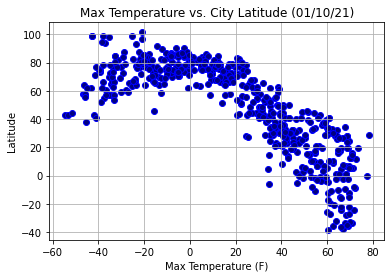

In [40]:
# Create a scatter plot for temperature and latitude
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.title("Max Temperature vs. City Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Max Temp vs Lat.png")
plt.show()

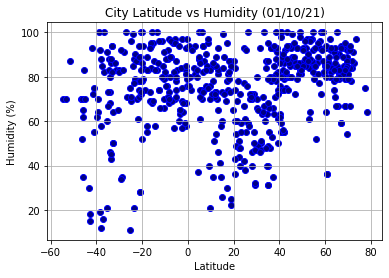

In [41]:
# Create a scatter plot for humidity and latitude
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Humidity.png")
plt.grid()
plt.show()

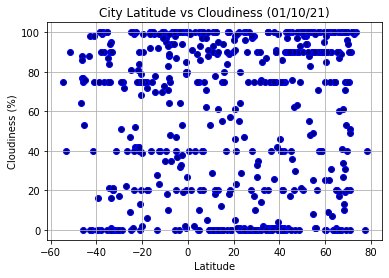

In [42]:
# Create a scatter plot for latitdue and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Cloudiness.png")
plt.grid()
plt.show()

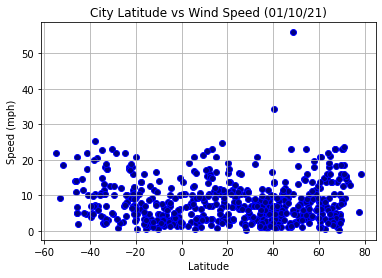

In [43]:
# Create a scatter plot for Wind Speed and Latitude 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("Lat vs Wind Speed.png")
plt.grid()
plt.show()

In [44]:
# Create Northern And Southern Hemisphere Data Frame

Northern_Hemisphere=weather_df[weather_df["Lat"]>0]
Southern_Hemisphere=weather_df[weather_df["Lat"]<0]


In [45]:
# Define Linear Regression Function
def Linear_Regression(x_values,y_values,xlabel,ylabel,annotate_coorid=(0,0)):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coorid,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    plt.show()

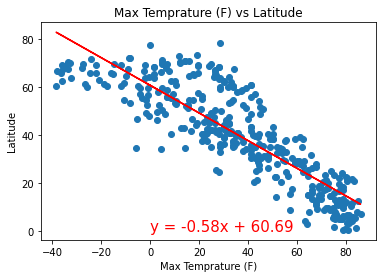

In [46]:
#Run Linear Regression
Linear_Regression(Northern_Hemisphere["Max Temp"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude")

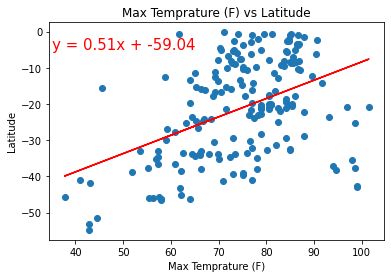

In [47]:
Linear_Regression(Southern_Hemisphere["Max Temp"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(35,-5))

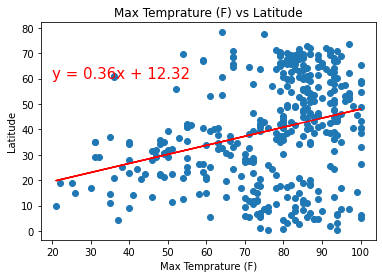

In [48]:
Linear_Regression(Northern_Hemisphere["Humidity"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,60))

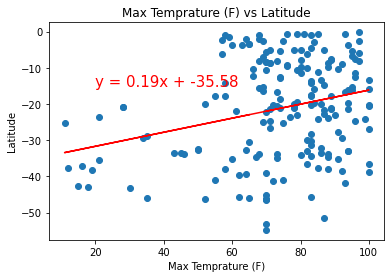

In [49]:
Linear_Regression(Southern_Hemisphere["Humidity"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,-15))

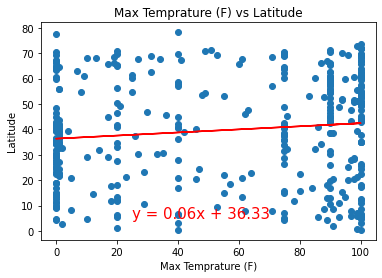

In [50]:
Linear_Regression(Northern_Hemisphere["Cloudiness"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(25,5))

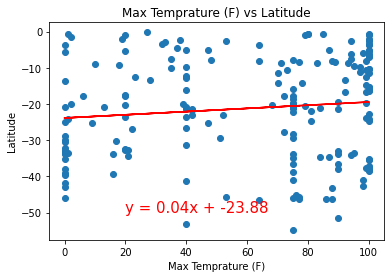

In [51]:
Linear_Regression(Southern_Hemisphere["Cloudiness"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(20,-50))

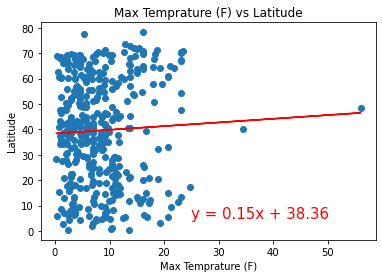

In [52]:
Linear_Regression(Northern_Hemisphere["Wind Speed"],Northern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(25,5))

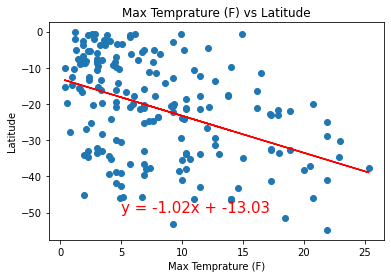

In [53]:
Linear_Regression(Southern_Hemisphere["Wind Speed"],Southern_Hemisphere["Lat"],"Max Temprature (F)","Latitude",(5,-50))